# 作业3：图像量化

In [19]:
from skimage import io,data,exposure
import matplotlib.pyplot as plt
%matplotlib inline

> 选取一张灰度图像，采用均匀量化方法将其灰度值量化为32个灰度等级，比较量化前后图像质量的差异

均匀量化过程：

- 首先img // 8, 这是整数除法，原本256个灰度值除以8，得到0-31共32个灰度值
- 再将结果* 8 ，相当于再映射回去，这样灰度量化为在0-255区间内均匀分布的32个灰度等级

量化以后，不放大看的情况下，图像只有细微的差别

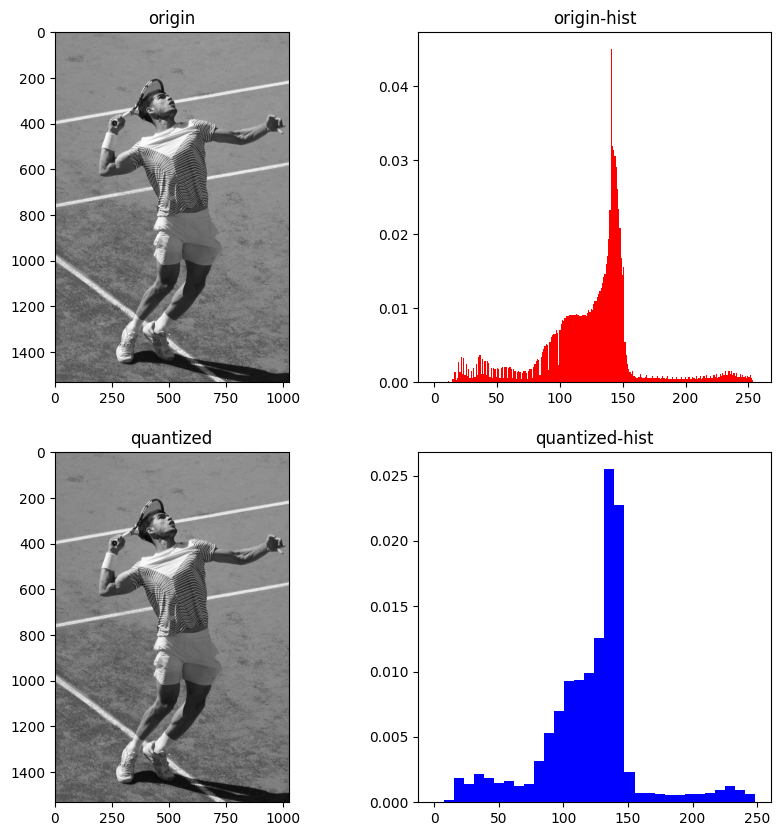

In [20]:
img = io.imread('Alcaraz_gray.jpg')

plt.figure("comparison", figsize=(10, 10))

arr = img.flatten()
plt.subplot(221)
plt.imshow(img, plt.cm.gray)  # 原始图像
plt.title("origin")

plt.subplot(222)
plt.hist(arr, bins=256, density=True, edgecolor='None', facecolor='red')  # 原始图像直方图
plt.title("origin-hist")

# 均匀量化为32个灰度等级
quantized_img = (img // 8) * 8
arr_quantized = quantized_img.flatten()

# 量化后的图像展示
plt.subplot(223)
plt.imshow(quantized_img, plt.cm.gray)
plt.title("quantized")

plt.subplot(224)
plt.hist(arr_quantized, bins=32, density=True, edgecolor='None', facecolor='blue')
plt.title("quantized-hist")

plt.show()

> 选取一张彩色图像，采用K-means方法将图像的颜色量化为128种颜色，比较量化前后图像质量的差异

-------

k-means方法的步骤为：
- 选择初始簇中心：随机选择k个点作为初始的质心（centroids），k为聚类数，**我们从图像中随机选取k个RGB值**
- 分配数据点：将每个数据点分配给距离最近的质心。这个距离通常使用欧几里得距离来计算。**我们将图像中的像素分配到颜色距离最短的那个类别索引中去**，色彩距离表示公式为：$$
dist^{2} = \sqrt{R^2 + G^2 + B^2}
$$
- 更新质心：计算各个索引下像素颜色的平均值，该平均值成为新的类别
- 重复步骤 2 和 3：不断重复数据点的分配和质心更新，直到质心位置不再发生变化或满足停止条件（如迭代次数达到预设值）。
- 迭代结束，将各个像素分配到色彩距离最小的那个类别当中去

这里我们可以直接调用sk-learn中的kmeans方法实现

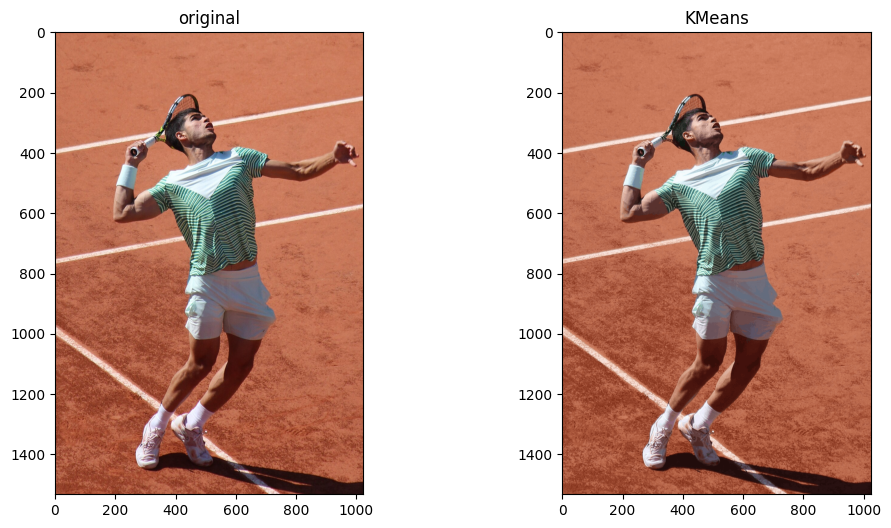

In [21]:
from sklearn.cluster import KMeans
img = io.imread('Alcaraz.jpg')

rows, cols, channels = img.shape
# 图像展平成二维数组
img_flatten = img.reshape(-1,3)
kmeans = KMeans(n_clusters=128, random_state=0).fit(img_flatten)

centroids = kmeans.cluster_centers_.astype('uint8')# 颜色转化为整数
labels = kmeans.labels_
quantized_img = centroids[labels].reshape(rows,cols,channels)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(img)
plt.title('original')

plt.subplot(122)
plt.imshow(quantized_img)
plt.title('KMeans')

plt.show()

因为128种颜色较多，所以彩色图像处理后与原始区别也不大。经过实验，如果更改聚类数量为16以下，可以看到明显的差别。